In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [4]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


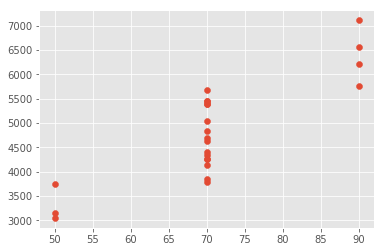

In [5]:
plt.scatter(df["space"],df["value"])

In [6]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

"""

In [7]:
sm = pystan.StanModel(model_code = stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ef597a9137b242c406fc64a47bf328b NOW.


In [8]:
stan_data = {"N":df.shape[0], "X":df["space"],"Y":df["value"]}

In [9]:
fit = sm.sampling(data = stan_data, iter=2000, warmup=500, chains = 3, seed=123)

In [10]:
fit

Inference for Stan model: anon_model_1ef597a9137b242c406fc64a47bf328b.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a       78.3    0.33  11.88   55.1  70.51   78.4  85.88 101.96   1290    1.0
b     -713.7   23.82 855.55  -2437  -1258 -715.6 -159.6  969.2   1290    1.0
sigma 617.66    2.82 104.67 455.58 542.67 602.89 677.78  861.8   1378    1.0
lp__  -152.0    0.04   1.36 -155.5 -152.6 -151.6 -151.0 -150.5    939    1.0

Samples were drawn using NUTS at Sun Feb 18 09:56:44 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

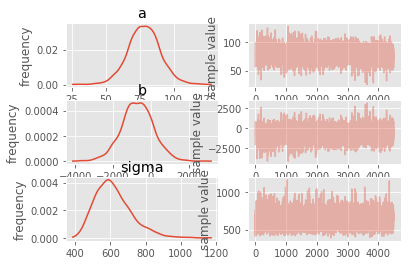

In [11]:
fig = fit.plot()

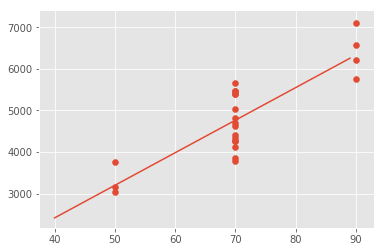

In [12]:
a = 78.3
b = -713.7
x = np.arange(40,90,1)
y = a * x + b
plt.plot(x,y)
plt.scatter(df["space"],df["value"])